
# Laboratory 4: Applying Ensemble Techniques to the Data

### 1. Import all the modules required to manipulate the data and evaluate the model:

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold

### 2. Import your dataset that you used from previous laboratory

In [3]:
df = pd.read_csv('/content/DE_BODA Laboratory_Activity_3_Cleaned_dataset.csv')

### 3. Import and Read the dataset

In [4]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### 4. Split the dataset into training and validation sets.

In [7]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

#Ensemble Modelling

# Bagging

### Use the Bagging Classifier!

In [10]:
# Import Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [12]:
# Specify Hyperparameters
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
# dt = DecisionTreeClassifier(criterion='entropy', random_state=11)

bc_params = {
    'estimator': dt,
    'n_estimators': 20,
    'max_samples': 0.5,
    'random_state': 11,
    'n_jobs': -1,
}

bc = BaggingClassifier(**bc_params)

### Fit the bagging classifier model to the training data and calculate the prediction accuracy.

In [13]:
dt.fit(X_train, y_train)
dt_preds_train = dt.predict(X_train)
dt_preds_val = dt.predict(X_test)


print('Decision Tree:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=dt_preds_train),
    accuracy_score(y_true=y_test, y_pred=dt_preds_val)
))


Decision Tree:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.9510


### Fit the bagging classifier model to the test data and calculate the prediction accuracy.

In [16]:
bc.fit(X_train, y_train)
bc_preds_train = bc.predict(X_train)
bc_preds_val = bc.predict(X_test)

print('Bagging Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=bc_preds_train),
    accuracy_score(y_true=y_test, y_pred=bc_preds_val)
))

Bagging Classifier:
> Accuracy on training data = 0.9883
> Accuracy on validation data = 0.9650


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_features': 0.5,
    'min_samples_leaf': 5,
    'random_state': 11,
    'n_jobs': -1
}
rf = RandomForestClassifier(**rf_params)

bc_params = {
    'estimator': rf,
    'n_estimators': 100,
    'max_samples': 0.5,
    'random_state': 11,
    'n_jobs': -1
}
bc = BaggingClassifier(**bc_params)

In [24]:
rf.fit(X_train, y_train)
rf_preds_train = rf.predict(X_train)
rf_preds_val = rf.predict(X_test)

print('Random Forest:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=rf_preds_train),
    accuracy_score(y_true=y_test, y_pred=rf_preds_val)
))

Random Forest:
> Accuracy on training data = 0.9812
> Accuracy on validation data = 0.9790


In [25]:
bc.fit(X_train, y_train)
bc_preds_train = bc.predict(X_train)
bc_preds_val = bc.predict(X_test)

print('Bagging Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=bc_preds_train),
    accuracy_score(y_true=y_test, y_pred=bc_preds_val)
))

Bagging Classifier:
> Accuracy on training data = 0.9671
> Accuracy on validation data = 0.9860


# Boosting

### Import the ensemble classifier for boosting:

In [17]:
from sklearn.ensemble import AdaBoostClassifier

### Specify the hyperparameters and initialize the model.

In [29]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

ab_params = {
    'n_estimators': 80,
    'estimator': dt,
    'random_state': 11
}
ab1 = AdaBoostClassifier(**ab_params)

In [30]:
rf_params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_features': 0.5,
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}
rf = RandomForestClassifier(**rf_params)

ab_params = {
    'n_estimators': 80,
    'estimator': rf,
    'random_state': 11
}
ab2 = AdaBoostClassifier(**ab_params)

### Fit the model to the training data.

In [31]:
ab1.fit(X_train, y_train)
abfit = ab1.fit(X_train, y_train)
ab_preds_train = ab1.predict(X_train)
ab_preds_val = ab1.predict(X_test)

print('Adaptive Boosting for Decision Tree:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}\n'.format(
    accuracy_score(y_true=y_train, y_pred=ab_preds_train),
    accuracy_score(y_true=y_test, y_pred=ab_preds_val)
))

ab2.fit(X_train, y_train)
abfit = ab2.fit(X_train, y_train)
ab_preds_train = ab2.predict(X_train)
ab_preds_val = ab2.predict(X_test)

print('Adaptive Boosting for Random Forest:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=ab_preds_train),
    accuracy_score(y_true=y_test, y_pred=ab_preds_val)
))

Adaptive Boosting for Decision Tree:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.9790

Adaptive Boosting for Random Forest:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.9720


### Calculate the prediction accuracy of the model on the training and validation data for a varying number of base estimators.

In [33]:
ab_params = {
    'estimator': dt,
    'random_state': 11
}

n_estimator_values = list(range(5, 250, 5))
train_accuracies, val_accuracies = [], []

for n_estimators in n_estimator_values:
    ab = AdaBoostClassifier(n_estimators=n_estimators, **ab_params)
    ab.fit(X_train, y_train)
    ab_preds_train = ab.predict(X_train)
    ab_preds_val = ab.predict(X_test)

    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=ab_preds_train))
    val_accuracies.append(accuracy_score(y_true=y_test, y_pred=ab_preds_val))

In [34]:
train_accuracies

[0.9389671361502347,
 0.9694835680751174,
 0.9765258215962441,
 0.9953051643192489,
 0.9976525821596244,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [35]:
val_accuracies

[0.9440559440559441,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.986013986013986,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.993006993006993,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993]

In [38]:
rf.fit(X_train, y_train)
ab_preds_train = rf.predict(X_train)
ab_preds_val = rf.predict(X_test)

import joblib

joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_score = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

avg_precision = average_precision_score(y_test, y_score)
print(avg_precision)

0.9976754475375056


### Plot a line graph to visualize the trend of the prediction accuracies on both the training and validation datasets:

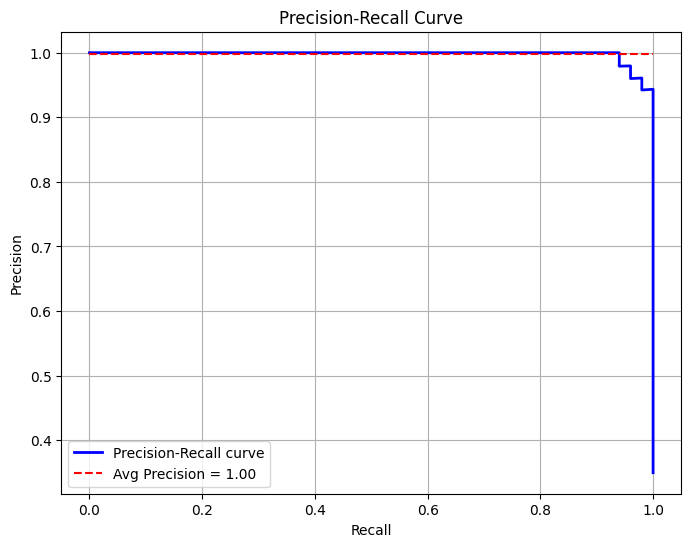

In [41]:
plt.figure(figsize=(8, 6))

# Plot Precision-Recall curve
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')

# Correct way: use hlines to plot a horizontal dashed line at avg_precision
plt.hlines(avg_precision, xmin=0, xmax=1, colors='r', linestyles='--', label=f'Avg Precision = {avg_precision:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


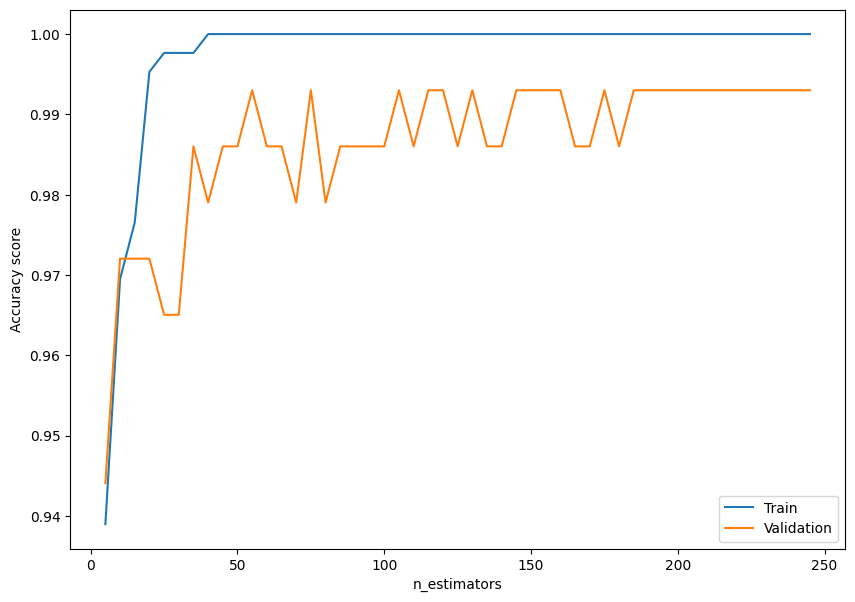

In [42]:
plt.figure(figsize=(10,7))
plt.plot(n_estimator_values, train_accuracies, label='Train')
plt.plot(n_estimator_values, val_accuracies, label='Validation')

plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')

plt.legend()
plt.show()